<a href="https://colab.research.google.com/github/harshi2309cmd/5731-/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [45]:
df=pd.read_csv("tweets_blacklivesmatter.csv")
df

,Unnamed: 0,text,date,user,location
0,0,Upcoming Event: Thursday 2 December - The Suns...,2021-12-01 10:36:00,BhmUK,UK
1,1,Agreed.. Tis why #ichangetheworld and the #Mat...,2021-12-01 10:34:41,dzifah,"Worcester, MA; Agotime, Ghana"
2,2,"RT @Amanbiede: Twitter, it is wrong to profile...",2021-12-01 10:34:35,at88357072,NaN
3,3,"Sat Jul 17 2021 Los Angeles, California - Poli...",2021-12-01 10:32:11,tbasharks,NaN
4,4,Right wing media obsessed with the idea of pro...,2021-12-01 10:31:14,Popitics1,NaN
...,...,...,...,...,...
9995,9995,RT @EasyMadam: @btbsoco @mohammed_hijab @DCCIm...,2021-11-29 12:48:49,EasyMadam,"England, United Kingdom"
9996,9996,@KundanT14718302 @RakeshTikaitBKU Remember \nB...,2021-11-29 12:48:20,ArnabDe52048760,NaN
9997,9997,RT @BefittingFacts: Why they use BLACK for som...,2021-11-29 12:48:07,iMadUnicorn,NaN
9998,9998,RT @marktsneed: My newest effort The Chase is ...,2021-11-29 12:47:58,SED54891,"Maywood, IL"


In [46]:
df_clean = df[~df.text.str.contains("RT")]
df_clean


,Unnamed: 0,text,date,user,location
0,0,Upcoming Event: Thursday 2 December - The Suns...,2021-12-01 10:36:00,BhmUK,UK
1,1,Agreed.. Tis why #ichangetheworld and the #Mat...,2021-12-01 10:34:41,dzifah,"Worcester, MA; Agotime, Ghana"
3,3,"Sat Jul 17 2021 Los Angeles, California - Poli...",2021-12-01 10:32:11,tbasharks,NaN
4,4,Right wing media obsessed with the idea of pro...,2021-12-01 10:31:14,Popitics1,NaN
5,5,@FrancisBoulle This why @BetoORourke @DNCWarRo...,2021-12-01 10:28:25,dzifah,"Worcester, MA; Agotime, Ghana"
...,...,...,...,...,...
9988,9988,If the blocking of @HornOfAfricaHub @LanderMid...,2021-11-29 12:51:35,zebby813,NaN
9991,9991,👍🏿👌🏿✌🏿\n#TwiTTer\n#BlackFriday \n#BlackTwitter...,2021-11-29 12:50:30,Pay69Day,GODS HANDS = JESUS WAS BLACK
9993,9993,In 2 weeks starts the Trial of the #Colston4 -...,2021-11-29 12:50:01,BristolDefenda1,Bristol
9994,9994,#Congo #SouthAfrica #BlackLivesMatter #COVID19...,2021-11-29 12:48:52,wa_kahugu,"Lokitaung, Kenya"


In [47]:
df_clean[["text"]]

,text
0,Upcoming Event: Thursday 2 December - The Suns...
1,Agreed.. Tis why #ichangetheworld and the #Mat...
3,"Sat Jul 17 2021 Los Angeles, California - Poli..."
4,Right wing media obsessed with the idea of pro...
5,@FrancisBoulle This why @BetoORourke @DNCWarRo...
...,...
9988,If the blocking of @HornOfAfricaHub @LanderMid...
9991,👍🏿👌🏿✌🏿\n#TwiTTer\n#BlackFriday \n#BlackTwitter...
9993,In 2 weeks starts the Trial of the #Colston4 -...
9994,#Congo #SouthAfrica #BlackLivesMatter #COVID19...


In [48]:
# Convert to list
data = df.text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Upcoming Event: Thursday 2 December - The Sunset Classroom : African '
 'Folklore Ashanti of Ghana #africanhistory… https://t.co/2rXWHJ5WO1']


In [49]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['upcoming', 'event', 'thursday', 'december', 'the', 'sunset', 'classroom', 'african', 'folklore', 'ashanti', 'of', 'ghana', 'africanhistory', 'https', 'co', 'rxwhj', 'wo']]


In [50]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['upcoming_event', 'thursday', 'december', 'the', 'sunset', 'classroom', 'african', 'folklore', 'ashanti', 'of', 'ghana', 'africanhistory', 'https', 'co', 'rxwhj', 'wo']


In [51]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [52]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['sunset', 'classroom', 'wo']]


In [53]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [54]:
id2word[0]


'classroom'

In [55]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('classroom', 1), ('sunset', 1), ('wo', 1)]]

In [56]:
#Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [57]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.075*"thing" + 0.050*"blm" + 0.049*"loan" + 0.048*"blacklive" + '
  '0.039*"group" + 0.038*"silver" + 0.031*"sparkly" + 0.024*"photography" + '
  '0.024*"artwork" + 0.023*"cartoon"'),
 (1,
  '0.245*"use" + 0.070*"much" + 0.032*"right" + 0.030*"believe" + 0.025*"work" '
  '+ 0.024*"thank" + 0.023*"call" + 0.021*"question" + 0.019*"self" + '
  '0.018*"find"'),
 (2,
  '0.067*"take" + 0.060*"s" + 0.041*"support" + 0.031*"month" + '
  '0.028*"everyday" + 0.027*"regret" + 0.026*"defend" + 0.026*"decision" + '
  '0.024*"knee" + 0.022*"player"'),
 (3,
  '0.203*"silence" + 0.178*"voice" + 0.150*"african" + 0.148*"amp" + '
  '0.102*"eu_foreign" + 0.026*"try" + 0.025*"bond_neede" + 0.017*"tie" + '
  '0.017*"includes_strengthening" + 0.015*"go"'),
 (4,
  '0.145*"stop" + 0.102*"movement" + 0.078*"ethiopian_acount" + 0.057*"know" + '
  '0.032*"real" + 0.030*"great" + 0.027*"accuse" + 0.023*"meanwhile" + '
  '0.023*"wnofx_byge" + 0.023*"lovely_lot"'),
 (5,
  '0.238*"white" + 0.204*"uncomfort

In [58]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.358917614363503

Coherence Score:  0.5503945906771956


In [61]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 4.0 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=9eb9771a979e5b4c8310f04ee6594398976ef403f6d848f60db86e13afa8fe34
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1


In [62]:
# Visualize the topics
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  return pd.DataFrame({'Term': vocab[term_ix], \


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.472111 -0.081928       1        1  46.583622
0      0.088471  0.055201       2        1   4.460687
15    -0.071157  0.064408       3        1   3.838281
14     0.050282 -0.337965       4        1   3.399755
3     -0.079899  0.059010       5        1   3.288906
18     0.026913  0.047231       6        1   3.216345
17     0.028588  0.042566       7        1   2.969379
1      0.049863  0.041502       8        1   2.967095
13    -0.110793  0.081720       9        1   2.942262
6      0.078423 -0.281316      10        1   2.898978
5     -0.031150  0.061397      11        1   2.738461
8      0.072869  0.026429      12        1   2.617417
7     -0.060423  0.028282      13        1   2.574257
4      0.046990  0.041766      14        1   2.473312
19     0.045400  0.028350      15        1   2.440615
2      0.088450  0.030200      16        1   2.403951
9      0.021760  0.057890      17        1   2.321009
12     0.079427  0.041269      18        1   2.254716
10     0.052908 -0.025922      19        1   2.180309
16     0.095190  0.019911      20        1   1.430641, topic_info=            Term         Freq        Total Category  logprob  loglift
15         black  1009.000000  1009.000000  Default  30.0000  30.0000
37        racist   769.000000   769.000000  Default  29.0000  29.0000
5             co   878.000000   878.000000  Default  28.0000  28.0000
43        racism   727.000000   727.000000  Default  27.0000  27.0000
132         make  3063.000000  3063.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
3648  disability     5.849763    11.369503  Topic20  -4.9916   3.5825
3651   town_hall     5.849763    11.369503  Topic20  -4.9916   3.5825
3649    environm     5.849763    11.369503  Topic20  -4.9916   3.5825
3650      summit     5.849763    11.369503  Topic20  -4.9916   3.5825
971     shopping     4.942330     8.902656  Topic20  -5.1602   3.6585

[706 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2179     14  0.942666  absolutely
2055     19  0.918629       abuse
2862     18  0.960352  acceptable
3350     20  0.832811      accord
515       9  0.993981     account
...     ...       ...         ...
828       6  0.928750    year_old
1517     14  0.951824         yet
3586      1  0.839084    yjiobyjz
313       6  0.875252       youth
2392      2  0.984218     youtube

[834 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 1, 16, 15, 4, 19, 18, 2, 14, 7, 6, 9, 8, 5, 20, 3, 10, 13, 11, 17])

Top 0 cluster which has thing,blm,blacklive,photography and artwork so on etc.,which infering the keywords deals as photography 0.075.
Top 1 cluster which has work,much,right,believe and question so on etc.,which infering the keywords deals as work 0.245.
Top 2 cluster which has take,much,right,believe and question so on etc.,which infering the keywords deals as work 0.245.
Top 1 cluster which has work,much,right,believe and question so on etc.,which infering the keywords deals as work 0.245.
Top 1 cluster which has work,much,right,believe and question so on etc.,which infering the keywords deals as work 0.245.
Top 2 cluster which has work,support,month,everyday and regret so on etc.,which infering the keywords deals as plsyers 0.067.
Top 3 cluster which has silence,voice,right,african and amp so on etc.,which infering the keywords deals as work 0.203.
Top 4 cluster which has stop,movement,ethiopian_acount,accuse and lovely_lot so on etc.,which infering the keywords deals as movement 0.145.
Top 5 cluster which has white,uncomfortable,gold,comfortable and terrorist so on etc.,which infering the keywords deals as terroist 0.238.
Top 6 cluster which has speak,unimaginable,mother,beautiful and damage so on etc.,which infering the keywords deals as damage 0.352. and so on.
 
 
 
 

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

**#Question 1**
Features used for the calculation of the sentiment analysis. Sentiment analysis is a study which focuses on identifying and classifying the ideas expressed in the form of text into positive, negative and neutral polarities. Feature selection is a crucial process in machine learning. In this question , i am  calculatr the  performance of different feature selection techniques for sentiment analysis. Term Frequency Inverse Document Frequency (TF-IDF) is used as the feature extraction technique for creating feature vocabulary. Various Feature Selection (FS) techniques are experimented to select the best set of features from feature vocabulary.And then taken sklearn in order to caluculate 80% and 20% testing and training.

In [2]:

# Write your code here
import pandas as pd
data=pd.read_csv("dataset.csv",encoding='ISO-8859-1')
data


,Document_id,clean_text,Sentiment
0,1,The concept of maximum entropy can be traced b...,Neutral
1,2,In most natural language processing applicatio...,Positive
2,3,Introduction Statistical natural language pro...,Positive
3,4,Robots that interact with humans face-to-face ...,Positive
4,5,Natural languages are languages spoken by huma...,Negative
...,...,...,...
93,94,Applying Natural Language Processing technique...,Neutral
94,95,We present a formal description of a logical l...,Negative
95,96,This paper describes a lexical organization in...,Neutral
96,97,"In this paper, we will present three browsing...",Positive


In [35]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
from sklearn import naive_bayes

# defining feature
tfidf_vect = TfidfVectorizer()
encoder = LabelEncoder()
x = tfidf_vect.fit_transform(data['clean_text'].values)

# Splitting data into training and testing data
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, data['Sentiment'],test_size=0.2)

def training_model(model_intializer):
  model = model_intializer
  model.fit(xtrain, ytrain)
  predicted = model.predict(xvalid)
  accuracy = accuracy_score(yvalid, predicted)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))

# Naive-Bayes
training_model(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.55
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.55      1.00      0.71        11
    Positive       0.00      0.00      0.00         8

    accuracy                           0.55        20
   macro avg       0.18      0.33      0.24        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
# SVM
training_model(svm.SVC())

Accuracy of Traning data: 0.55
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.55      1.00      0.71        11
    Positive       0.00      0.00      0.00         8

    accuracy                           0.55        20
   macro avg       0.18      0.33      0.24        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [3]:
# Write your code here
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
import numpy as np

num_columns = train_data.select_dtypes(include=[np.number]).columns.tolist()
print('\n', len(num_columns), 'columns which are numerical')


 38 columns which are numerical


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


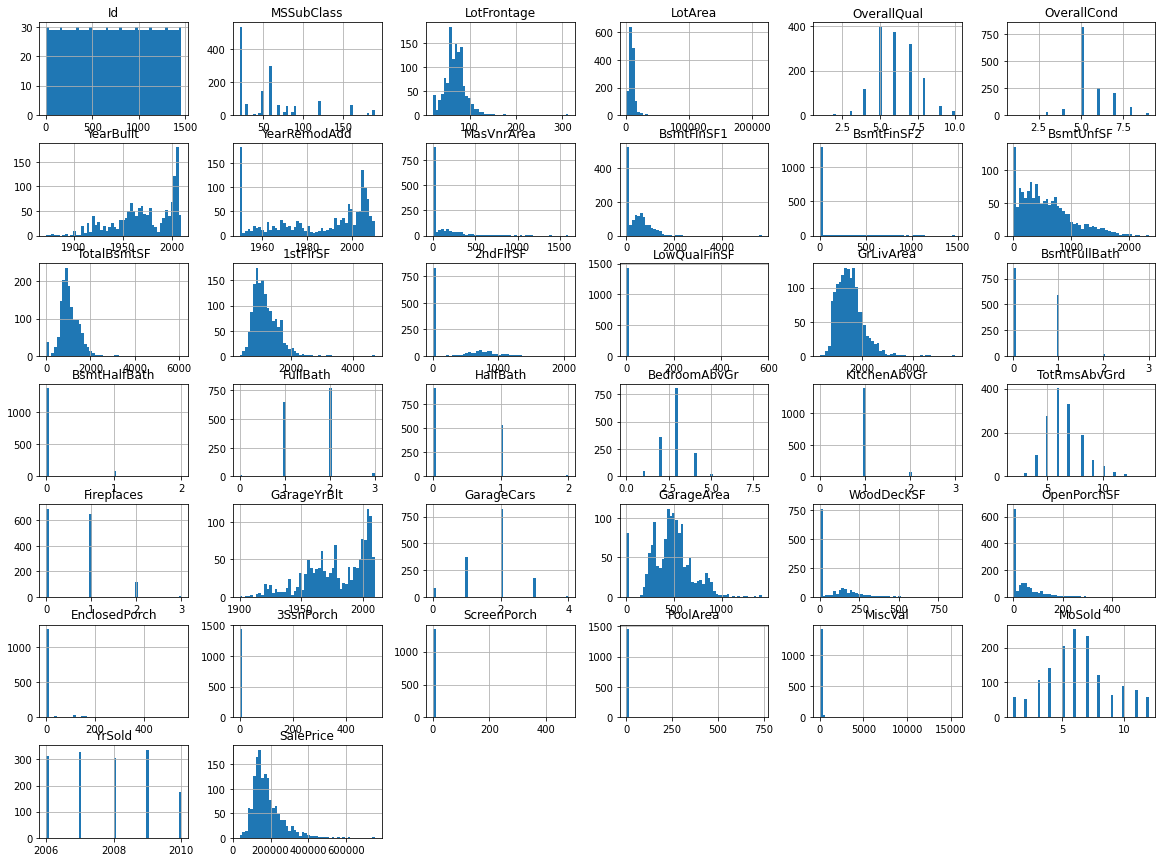

In [7]:
#plotting the graphs for the columns
%matplotlib inline
import matplotlib.pyplot as plt
train_data[num_columns].hist(bins=50, figsize=(20,15))
plt.savefig("histogram_plots")
plt.show()

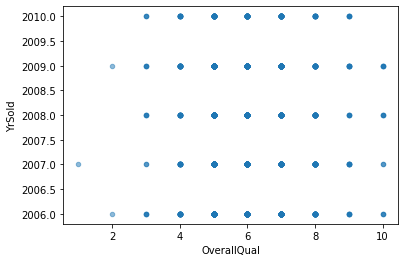

In [27]:
X_train.plot(kind="scatter", x="OverallQual", y="YrSold", alpha=0.5)

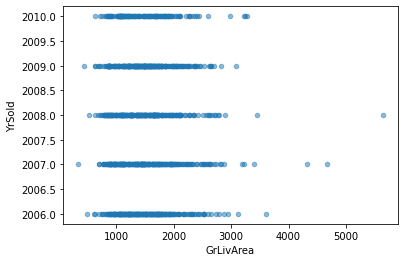

In [28]:
X_train.plot(kind="scatter", x="GrLivArea", y="YrSold", alpha=0.5)

In [ ]:
#finding correlation matrix
correlation_matrix = train_data.corr()
correlation_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

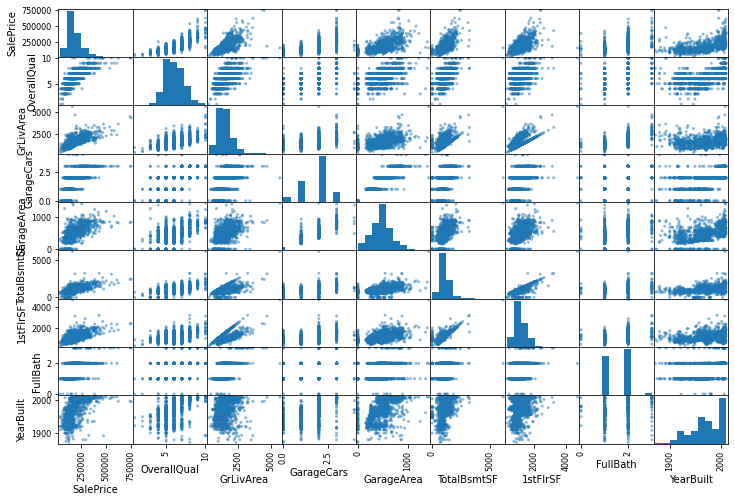

In [ ]:
#plotting correlation matrix
from pandas.plotting import scatter_matrix
columns = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea","TotalBsmtSF","1stFlrSF", "FullBath","YearBuilt" ]
scatter_matrix(train_data[columns], figsize=(12, 8))
plt.savefig('matrix.png')

In [9]:
#checking null values from the data
train_data = train_data.replace(np.NaN,0)
test_data = test_data.replace(np.NaN,0)
print(train_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [10]:
print(test_data.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [11]:
category_columns_train = train_data.select_dtypes(include=[object]).columns.tolist()

category_columns_test = test_data.select_dtypes(include=[object]).columns.tolist()

In [12]:
dummies_train = pd.get_dummies(train_data[category_columns_train],prefix_sep='_',drop_first=False)
print(dummies_train.shape)


(1460, 268)


In [13]:
dummies_test = pd.get_dummies(test_data[category_columns_test],prefix_sep='_',drop_first=False)
print(dummies_test.shape)

(1459, 256)


In [14]:
train_data = pd.concat([train_data, dummies_train], axis=1)
print(train_data.shape)


(1460, 349)


In [15]:
test_data = pd.concat([test_data, dummies_test], axis=1)
print(test_data.shape)

(1459, 336)


In [16]:
train_data.drop(category_columns_train,axis=1,inplace=True)
test_data.drop(category_columns_test,axis=1,inplace=True)

In [17]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageQual_Po,GarageQual_TA,GarageCond_0,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_0,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_0,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,0,0,...,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [18]:
test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_0,MSZoning_C (all),MSZoning_FV,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_0,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_0,PoolQC_Ex,PoolQC_Gd,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_0,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [19]:
#Train and Build a Linear Regression Model
from sklearn.model_selection import train_test_split 
X = train_data.drop('SalePrice',axis=1)
Y = train_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = LinearRegression.predict(X_test)

In [22]:
LinearRegression.predict(X_train)

array([148792.89950097,  94329.293778  , 192640.64002855, ...,
       128121.30440616,  86818.470342  ,  87051.9616036 ])

In [23]:
print(pd.DataFrame({'predicted Sales Prices':y_pred}))

     predicted Sales Prices
0             213112.555155
1             160591.356417
2             110649.509732
3              76148.296182
4             131202.467956
..                      ...
287           104160.555878
288           235327.049370
289            82280.644291
290            63763.612908
291           321446.089870

[292 rows x 1 columns]


In [24]:
#Calculate R squared
print('Linear Regression R squared": %.4f' % LinearRegression.score(X_test, y_test))

Linear Regression R squared": 0.8636


In [25]:
#Calculate root-mean-square error (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 31188.7444


In [26]:
#Calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 18673.0885
